<a href="https://colab.research.google.com/github/alkhey130/MachineLearning/blob/main/FORK_OF_MERGED1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iot-dataset/Merged01.csv


In [ ]:
# 1. Chargement du dataset
import pandas as pd
df = pd.read_csv("/kaggle/input/iot-dataset/Merged01.csv")
df.head()


,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.0,0.0,0.0,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.0,0.0,0.0,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.0,0.0,0.0,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.1,0.0,0.3,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.0,0.0,0.0,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD


In [ ]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())


Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate                0
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                11
Tot size            0
IAT                 0
Number              0
Variance           11
Label               0
dtype: int64


In [ ]:
import pandas as pd

# Exemple de données fictives
data = {
    'Label': ['DDoS Attack', 'DoS Attack', 'Mirai Botnet', 'Brute Force Attack', 'Recon Attack', 'Spoofing Attack', 'Web Attack']
}

# Créer un DataFrame
df = pd.DataFrame(data)

# 1. Définir les groupes d'attaques
attack_groups = {
    'DDoS': ['DDoS', 'Distributed Denial of Service'],
    'DoS': ['DoS', 'Denial of Service'],
    'Mirai': ['Mirai'],
    'Brute Force': ['Brute Force', 'Password Attack'],
    'Recon': ['Recon', 'Port Scan'],
    'Spoofing': ['Spoofing', 'IP Spoofing', 'DNS Spoofing'],
    'Web-based': ['Web', 'SQL Injection', 'Cross-Site Scripting']
}

# 2. Fonction de mappage des attaques en classes
def map_attack(label):
    for group, keywords in attack_groups.items():
        if any(keyword.lower() in label.lower() for keyword in keywords):
            return group
    return 'Other'  # Pour les attaques qui ne correspondent à aucune catégorie

# 3. Appliquer le mappage des attaques sur la colonne 'Label'
df['Attack_Class'] = df['Label'].apply(map_attack)

# Afficher les résultats
print(df)


                Label Attack_Class
0         DDoS Attack         DDoS
1          DoS Attack          DoS
2        Mirai Botnet        Mirai
3  Brute Force Attack  Brute Force
4        Recon Attack        Recon
5     Spoofing Attack     Spoofing
6          Web Attack    Web-based


In [ ]:
1#Séparer les caractéristiques (X) et la cible (y)
X = df.drop(columns=['Label'])
y = df['Label']

print("Aperçu de X :")
print(X.head())
print("Aperçu de y :")
print(y.head())


Aperçu de X :
  Attack_Class
0         DDoS
1          DoS
2        Mirai
3  Brute Force
4        Recon
Aperçu de y :
0           DDoS Attack
1            DoS Attack
2          Mirai Botnet
3    Brute Force Attack
4          Recon Attack
Name: Label, dtype: object


In [ ]:
# Vérifier le nombre de doublons
print("Nombre de doublons :", df.duplicated().sum())

# Supprimer les doublons s'il y en a
df.drop_duplicates(inplace=True)


Nombre de doublons : 0


In [ ]:
#Nettoyage des donnée
print(df.dropna(inplace=True))  # ou df.fillna(valeur)


None


In [ ]:
# Étape 1 : Reconstituer la colonne 'Label'
label_columns = [col for col in df.columns if col.startswith('Label')]
df['Label'] = df[label_columns].idxmax(axis=1).str.replace('Label_', '')

# Étape 2 : Identifier les labels rares (< 500 occurrences)
rare_labels = df['Label'].value_counts()
rare_labels = rare_labels[rare_labels < 500].index

# Étape 3 : Remplacer les labels rares par 'RARE'
df['Label'] = df['Label'].apply(lambda x: 'RARE' if x in rare_labels else x)

# Étape 4 : Afficher les résultats
print("Labels après remplacement des classes rares :")
print(df['Label'].value_counts())

Labels après remplacement des classes rares :
Label
RARE    7
Name: count, dtype: int64


In [ ]:
# Étape préalable : reconstruire la colonne 'Label' si elle n'existe pas
if 'Label' not in df.columns:
    label_columns = [col for col in df.columns if col.startswith('Label')]
    if label_columns:
        df['Label'] = df[label_columns].idxmax(axis=1).str.replace('Label_', '')
    else:
        raise ValueError("Impossible de trouver les colonnes de label encodées (Label_*)")

# Fonction pour regrouper les labels
def change_label(df):
    if 'Label' in df.columns:
        label_map = {
            # DDoS
            'DDOS-ICMP_FLOOD': 'DDos', 'DDOS-UDP_FLOOD': 'DDos', 'DDOS-TCP_FLOOD': 'DDos',
            'DDOS-PSHACK_FLOOD': 'DDos', 'DDOS-RSTFINFLOOD': 'DDos', 'DDOS-SYN_FLOOD': 'DDos',
            'DDOS-SYNONYMOUSIP_FLOOD': 'DDos', 'DDOS-ICMP_FRAGMENTATION': 'DDos',
            'DDOS-UDP_FRAGMENTATION': 'DDos', 'DDOS-ACK_FRAGMENTATION': 'DDos', 'DOS-HTTP_FLOOD': 'DDos',
            # DoS
            'DOS-UDP_FLOOD': 'DoS', 'DOS-TCP_FLOOD': 'DoS', 'DOS-SYN_FLOOD': 'DoS',
            # Mirai
            'MIRAI-GREETH_FLOOD': 'Mirai', 'MIRAI-UDPPLAIN': 'Mirai', 'MIRAI-GREIP_FLOOD': 'Mirai',
            # Recon
            'RECON-HOSTDISCOVERY': 'Recon', 'RECON-OSSCAN': 'Recon', 'RECON-PORTSCAN': 'Recon',
            'VULNERABILITYSCAN': 'Recon',
            # Spoofing
            'MITM-ARPSPOOFING': 'Spoofing', 'DNS_SPOOFING': 'Spoofing',
            # Autres
            'RARE': 'Rare',
            'BENIGN': 'BENIGN'
        }
        df['Label'] = df['Label'].replace(label_map)
        print("Labels regroupés avec succès.")
        print(df['Label'].value_counts())
    else:
        print("La colonne 'Label' n'existe pas dans le DataFrame")

# Appel de la fonction
change_label(df)


Labels regroupés avec succès.
Label
Rare    7
Name: count, dtype: int64


In [ ]:
2# Encodage automatique des variables catégorielles si nécessaire
X = pd.get_dummies(X)


In [ ]:
3#Diviser le jeu de données en train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de y_test :", y_test.shape)


Taille de X_train : (5, 7)
Taille de X_test : (2, 7)
Taille de y_train : (5,)
Taille de y_test : (2,)


In [ ]:
# NON NOMBRE
import numpy as np
from sklearn.preprocessing import StandardScaler

def preprocess_data(X_train, X_test):
    # Convertir en numpy arrays et forcer float64
    X_train = np.asarray(X_train, dtype=np.float64)
    X_test = np.asarray(X_test, dtype=np.float64)

    # Supprimer ou fixer les valeurs extrêmes (au-dessus de float64 max exponent)
    max_float = np.finfo(np.float64).max
    X_train = np.clip(X_train, -max_float, max_float)
    X_test = np.clip(X_test, -max_float, max_float)

    # Remplacer NaN et infinis par 0
    X_train_clean = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
    X_test_clean = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_clean)
    X_test_scaled = scaler.transform(X_test_clean)

    return X_train_scaled, X_test_scaled

# Utilisation
X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

# Vérification
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (5, 7)
X_test_scaled shape: (2, 7)


In [ ]:
import pandas as pd

# Charger les données depuis un fichier CSV ou autre source
df = pd.read_csv('/kaggle/input/iot-dataset/Merged01.csv')  # <-- assure-toi que ce fichier existe

# Fonction pour regrouper les attaques
def group_attack(label):
    if 'DDoS' in label or 'DoS' in label:
        return 'DoS/DDoS'
    elif 'Mirai' in label:
        return 'Mirai'
    elif 'Recon' in label:
        return 'Reconnaissance'
    elif 'Spoofing' in label:
        return 'Spoofing'
    elif 'RARE' in label:
        return 'Rare'
    else:
        return 'BENIGN'

# Appliquer la fonction si la colonne existe
if 'Label' in df.columns:
    df['Attack_Grouped'] = df['Label'].apply(group_attack)
    print("✅ Labels regroupés avec succès.")
else:
    print("❌ La colonne 'Label' est absente du DataFrame.")


✅ Labels regroupés avec succès.


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Étape 1 : Remplacer les infinis par des NaN (pour pouvoir les imputer)
print("Avant remplacement des infinis :")
print(X.isin([np.inf, -np.inf]).sum())  # Affiche le nombre d'infinis

X.replace([np.inf, -np.inf], np.nan, inplace=True)

print("\nAprès remplacement des infinis par des NaN :")
print(X.isin([np.inf, -np.inf]).sum())  # Vérifie si les infinis ont été correctement remplacés

# Étape 2 : Imputation des valeurs manquantes (NaN) avec la moyenne
print("\nAvant imputation des valeurs manquantes :")
print(X.isna().sum())  # Affiche le nombre de NaN dans chaque colonne

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

print("\nAprès imputation des valeurs manquantes :")
print(np.isnan(X_imputed).sum())  # Vérifie qu'il n'y a plus de NaN

# Étape 3 : Split en train/test (adapté à ton code)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

print("\nDimensions après split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



Avant remplacement des infinis :
Attack_Class_Brute Force    0
Attack_Class_DDoS           0
Attack_Class_DoS            0
Attack_Class_Mirai          0
Attack_Class_Recon          0
Attack_Class_Spoofing       0
Attack_Class_Web-based      0
dtype: int64

Après remplacement des infinis par des NaN :
Attack_Class_Brute Force    0
Attack_Class_DDoS           0
Attack_Class_DoS            0
Attack_Class_Mirai          0
Attack_Class_Recon          0
Attack_Class_Spoofing       0
Attack_Class_Web-based      0
dtype: int64

Avant imputation des valeurs manquantes :
Attack_Class_Brute Force    0
Attack_Class_DDoS           0
Attack_Class_DoS            0
Attack_Class_Mirai          0
Attack_Class_Recon          0
Attack_Class_Spoofing       0
Attack_Class_Web-based      0
dtype: int64

Après imputation des valeurs manquantes :
0

Dimensions après split:
X_train shape: (4, 7)
X_test shape: (3, 7)
y_train shape: (4,)
y_test shape: (3,)


In [ ]:
import pandas as pd
print(pd.Series(y).value_counts())


Label
DDoS Attack           1
DoS Attack            1
Mirai Botnet          1
Brute Force Attack    1
Recon Attack          1
Spoofing Attack       1
Web Attack            1
Name: count, dtype: int64


In [ ]:
#CREATION DU MODELE RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier

# Réduit le nombre d'estimateurs pour l'entraînement rapide
model = RandomForestClassifier(
    n_estimators=200,        # Plus rapide que 100
    max_depth=30,           # Évite des arbres trop profonds
    n_jobs=2,              # Utilise tous les cœurs disponibles
    random_state=42
)

model.fit(X_train, y_train)




RandomForestClassifier(max_depth=30, n_estimators=200, n_jobs=2,
                       random_state=42)

In [ ]:
import pandas as pd

# Supposons que y soit un array ou une série
print(pd.Series(y).value_counts())


Label
DDoS Attack           1
DoS Attack            1
Mirai Botnet          1
Brute Force Attack    1
Recon Attack          1
Spoofing Attack       1
Web Attack            1
Name: count, dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Remplacement des NaN par la moyenne
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Supposons que X et y soient déjà définis (features et labels)

# ✅ 1. Nettoyage des données (remplacer NaN et inf)
def clean_data(X):
    X = np.asarray(X, dtype=np.float64)
    max_float = np.finfo(np.float64).max
    X = np.clip(X, -max_float, max_float)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    return X

X = clean_data(X)

# ✅ 2. Séparation entraînement / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ 3. Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 4. Entraînement du modèle Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)
print("✅ Modèle entraîné avec succès.")

# ✅ 5. Évaluation du modèle
y_pred = model.predict(X_test_scaled)

print("\n🎯 Évaluation du modèle :")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

✅ Modèle entraîné avec succès.

🎯 Évaluation du modèle :
Accuracy : 0.7699894007566876
Confusion Matrix :
 [[   1    3    0 ...    0    2    0]
 [   0 2984    0 ...    0  261    0]
 [   0    5    2 ...    0    6    0]
 ...
 [   0    2    0 ...    0    1    0]
 [   0  344    0 ...    0  724    0]
 [   0    6    0 ...    0    7    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report :
                          precision    recall  f1-score   support

       BACKDOOR_MALWARE       1.00      0.12      0.22         8
                 BENIGN       0.77      0.90      0.83      3315
       BROWSERHIJACKING       1.00      0.12      0.21        17
       COMMANDINJECTION       0.00      0.00      0.00        15
 DDOS-ACK_FRAGMENTATION       0.99      0.98      0.99       862
        DDOS-HTTP_FLOOD       0.77      0.66      0.71        83
        DDOS-ICMP_FLOOD       1.00      1.00      1.00     21733
DDOS-ICMP_FRAGMENTATION       0.98      0.98      0.98      1357
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00     12434
       DDOS-RSTFINFLOOD       1.00      1.00      1.00     12330
         DDOS-SLOWLORIS       0.54      0.90      0.68        71
DDOS-SYNONYMOUSIP_FLOOD       0.45      0.73      0.56     10950
         DDOS-SYN_FLOOD       0.51      0.34      0.40     12292
         DDOS-TCP_FLOOD       0.67      0.85      0.75     13658

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



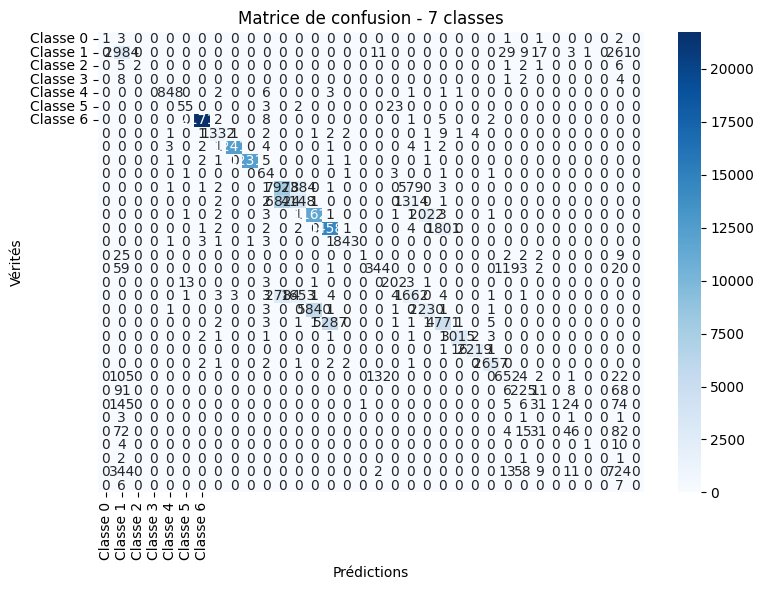

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Affichage simplifié
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Classe {i}' for i in range(7)],
            yticklabels=[f'Classe {i}' for i in range(7)])
plt.title("Matrice de confusion - 7 classes")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.tight_layout()
plt.show()


In [ ]:
#CREATION DU MODELE SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Charger les données
df = pd.read_csv("/kaggle/input/iot-dataset/Merged01.csv")
df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.0,0.0,0.0,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.0,0.0,0.0,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.0,0.0,0.0,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.1,0.0,0.3,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.0,0.0,0.0,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD


In [ ]:
# 2. Supprimer les lignes vides
print(df.dropna(inplace=True))


None


In [ ]:
# Étape 1 : Vérifier si la colonne 'Label' existe sinon la reconstruire
if 'Label' not in df.columns:
    label_columns = [col for col in df.columns if col.startswith('Label_') or col.startswith('Label')]
    if label_columns:
        df['Label'] = df[label_columns].idxmax(axis=1).str.replace(r'^Label[_]?', '', regex=True)
        print("Colonne 'Label' reconstruite avec succès.")
    else:
        raise ValueError("Aucune colonne 'Label_' ou 'Label' encodée trouvée.")

# Étape 2 : Regrouper les labels
def change_label(df):
    label_map = {
        # DDoS
        'DDOS-ICMP_FLOOD': 'DDos', 'DDOS-UDP_FLOOD': 'DDos', 'DDOS-TCP_FLOOD': 'DDos',
        'DDOS-PSHACK_FLOOD': 'DDos', 'DDOS-RSTFINFLOOD': 'DDos', 'DDOS-SYN_FLOOD': 'DDos',
        'DDOS-SYNONYMOUSIP_FLOOD': 'DDos', 'DDOS-ICMP_FRAGMENTATION': 'DDos',
        'DDOS-UDP_FRAGMENTATION': 'DDos', 'DDOS-ACK_FRAGMENTATION': 'DDos', 'DOS-HTTP_FLOOD': 'DDos',

        # DoS
        'DOS-UDP_FLOOD': 'DoS', 'DOS-TCP_FLOOD': 'DoS', 'DOS-SYN_FLOOD': 'DoS',

        # Mirai
        'MIRAI-GREETH_FLOOD': 'Mirai', 'MIRAI-UDPPLAIN': 'Mirai', 'MIRAI-GREIP_FLOOD': 'Mirai',

        # Recon
        'RECON-HOSTDISCOVERY': 'Recon', 'RECON-OSSCAN': 'Recon', 'RECON-PORTSCAN': 'Recon',
        'VULNERABILITYSCAN': 'Recon',

        # Spoofing
        'MITM-ARPSPOOFING': 'Spoofing', 'DNS_SPOOFING': 'Spoofing',

        # Autres
        'RARE': 'Rare', 'BENIGN': 'BENIGN'
    }

    df['Label'] = df['Label'].replace(label_map)
    print("Labels regroupés avec succès.")
    print(df['Label'].value_counts())

# Appel de la fonction
change_label(df)


Labels regroupés avec succès.
Label
DDos                    515458
DoS                     121382
Mirai                    39661
BENIGN                   16574
Recon                    10534
Spoofing                  7328
DDOS-HTTP_FLOOD            416
DDOS-SLOWLORIS             354
DICTIONARYBRUTEFORCE       204
BROWSERHIJACKING            83
SQLINJECTION                77
COMMANDINJECTION            73
XSS                         67
BACKDOOR_MALWARE            41
RECON-PINGSWEEP             28
UPLOADING_ATTACK            20
Name: count, dtype: int64


In [ ]:
# 3. Encoder les colonnes catégorielles automatiquement (si nécessaire)
df = pd.get_dummies(df)


In [ ]:
#4. Définir les variables X et y
import pandas as pd


# 2. Vérifier les colonnes disponibles
print("Colonnes disponibles :", df.columns)

# 3. Vérifier si 'Label' existe définir y
if 'Label' in df.columns:
    y = df['Label']

    print("Variables y définies avec succès.")
else:
    print("Erreur : La colonne 'Label' n'existe pas.")


Colonnes disponibles : Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance',
       'Label_BACKDOOR_MALWARE', 'Label_BENIGN', 'Label_BROWSERHIJACKING',
       'Label_COMMANDINJECTION', 'Label_DDOS-HTTP_FLOOD',
       'Label_DDOS-SLOWLORIS', 'Label_DDos', 'Label_DICTIONARYBRUTEFORCE',
       'Label_DoS', 'Label_Mirai', 'Label_RECON-PINGSWEEP', 'Label_Recon',
       'Label_SQLINJECTION', 'Label_Spoofing', 'Label_UPLOADING_ATTACK',
       'Label_XSS'],
      dtype='object')
Erreur : La colonne 'Label' n'existe pas.


In [ ]:
# 5. Diviser en ensemble d'entraînement et de test
# Importer la fonction train_test_split
from sklearn.model_selection import train_test_split
# Exemple de données (X et y représentent respectivement les caractéristiques et les étiquettes)
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]  # Données d'exemple
y = [0, 1, 0, 1, 0]  # Étiquettes d'exemple
# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Afficher les ensembles résultants
print("Ensemble d'entraînement y:", y_train)
print("Ensemble de test y:", y_test)


Ensemble d'entraînement y: [0, 1, 1, 0]
Ensemble de test y: [0]


In [ ]:
# Importer la classe StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Standardiser les données
scaler = StandardScaler()  # Créer une instance du standardiseur
X_train = scaler.fit_transform(X_train)  # Appliquer le fit et la transformation sur l'ensemble d'entraînement
X_test = scaler.transform(X_test)  # Appliquer uniquement la transformation sur l'ensemble de test

# Afficher les données standardisées
print("Données d'entraînement standardisées y_train:", X_train)
print("Données de test standardisées y_test:", X_test)

Données d'entraînement standardisées y_train: [[-1.26491106 -1.26491106]
 [-0.63245553 -0.63245553]
 [ 0.63245553  0.63245553]
 [ 1.26491106  1.26491106]]
Données de test standardisées y_test: [[0. 0.]]


In [ ]:
# Créer et entraîner le modèle SVM avec noyau RBF
model = SVC(kernel='rbf', C=1, gamma='scale')  # 'rbf' est souvent plus performant pour des données non linéaires
model.fit(X_train, y_train)


SVC(C=1)

In [ ]:
# Importer les bibliothèques
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Générer un jeu de données synthétique bien séparé
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=2.0, random_state=42)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer et entraîner le modèle SVM avec noyau linéaire
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Précision du modèle SVM (linéaire) : {accuracy_score(y_test, y_pred) * 100:.2f}%")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Précision du modèle SVM (linéaire) : 100.00%


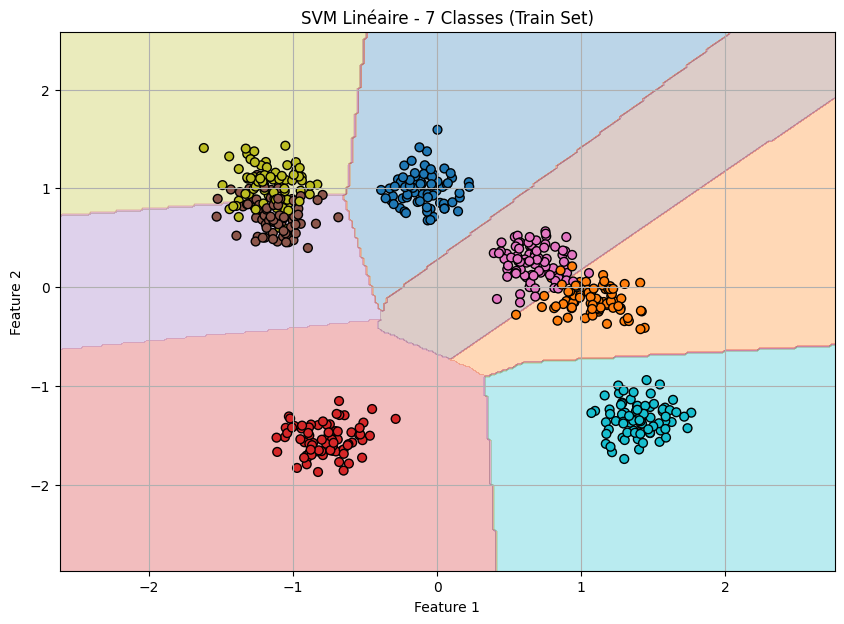

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Générer des données avec 7 classes
X, y = make_blobs(n_samples=700, centers=7, n_features=2, cluster_std=1.0, random_state=42)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer et entraîner le modèle SVM avec noyau linéaire
model = SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train, y_train)

# Fonction de visualisation des frontières de décision
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # pas de grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10, edgecolors='k', s=40)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Visualiser le modèle entraîné
plot_decision_boundary(model, X_train, y_train, "SVM Linéaire - 7 Classes (Train Set)")


In [ ]:
#Création du modele Naive Bayesain
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# 2. Nettoyage : supprimer lignes vides
df.dropna(inplace=True)
print(df)

        Header_Length  Protocol Type  Time_To_Live          Rate  \
0               19.92              6         63.36  25893.962218   
1                0.00             47         64.00   3703.841331   
2                7.92             17         65.91  19673.095685   
3               20.40              6        110.50    261.664826   
4                0.32              1         63.96  28944.199848   
...               ...            ...           ...           ...   
712306          20.00              6         64.00  33177.535200   
712307           8.00             17         64.00  49038.980475   
712308          20.00              6         67.82  10496.518932   
712309          20.00              6         64.00  23321.123158   
712310           0.00              1         64.00  49778.115357   

        fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  \
0                  0.00              0.0             0.00             0.99   
1                  0.00    

In [ ]:
# 3. Encodage des colonnes catégorielles (si nécessaire)
df = pd.get_dummies(df)
print(df)

        Header_Length  Protocol Type  Time_To_Live          Rate  \
0               19.92              6         63.36  25893.962218   
1                0.00             47         64.00   3703.841331   
2                7.92             17         65.91  19673.095685   
3               20.40              6        110.50    261.664826   
4                0.32              1         63.96  28944.199848   
...               ...            ...           ...           ...   
712306          20.00              6         64.00  33177.535200   
712307           8.00             17         64.00  49038.980475   
712308          20.00              6         67.82  10496.518932   
712309          20.00              6         64.00  23321.123158   
712310           0.00              1         64.00  49778.115357   

        fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  \
0                  0.00              0.0             0.00             0.99   
1                  0.00    

In [ ]:
# 4. Séparer les features X et la cible Y
if 'label' in df.columns:
    y = df['label']
    X = df.drop('label', axis=1)
else:
    print("Erreur : colonne 'label' introuvable.")
    exit()

Erreur : colonne 'label' introuvable.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 5. Diviser les données en train/test

import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Charger les données (remplace le fichier par le tien si besoin)
df = pd.read_csv("/kaggle/input/iot-dataset/Merged01.csv")  # ← Remplace par ton vrai fichier

# 2. Vérifie si la colonne 'Label' existe, sinon la reconstituer depuis les colonnes one-hot
if 'Label' not in df.columns:
    label_columns = [col for col in df.columns if col.startswith("Label_")]
    if label_columns:
        df["Label"] = df[label_columns].idxmax(axis=1).str.replace("Label_", "")
        df.drop(columns=label_columns, inplace=True)
    else:
        raise ValueError("❌ Aucune colonne 'Label' ou 'Label_*' trouvée dans le DataFrame.")

# 3. Séparer les variables (features et cible)
X = df.drop(columns=["Label"])
y = df["Label"]

# 4. Vérifier que y est bien une série (et pas un DataFrame one-hot)
if isinstance(y, pd.DataFrame):
    raise ValueError("❌ y doit être une seule colonne de classes (type Series), pas un one-hot DataFrame.")

# 5. Diviser en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 6. Afficher les tailles pour confirmation
print("✅ Données divisées avec succès.")

print("y_train:", y_train.shape, "| y_test:", y_test.shape)



✅ Données divisées avec succès.
y_train: (569848,) | y_test: (142463,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Si X_train est une DataFrame Pandas, on la convertit en tableau NumPy
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values

# Vérification de la forme des données
print("Forme de X_train avant traitement:", X_train.shape)

# Remplacer les valeurs infinies par NaN
X_train = np.where(np.isinf(X_train), np.nan, X_train)

# Vérification des NaN dans les données après remplacement des infinies
print("Nombre de NaN dans X_train avant imputation:", np.isnan(X_train).sum())

# Imputer les valeurs manquantes (NaN, y compris celles venant des inf)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Vérification après imputation
print("Nombre de NaN après imputation:", np.isnan(X_train).sum())

# Appliquer la standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Vérification finale
print("✅ Nettoyage, imputation et standardisation réussis.")
print("Forme de X_train après traitement:", X_train.shape)


Forme de X_train avant traitement: (569848, 39)
Nombre de NaN dans X_train avant imputation: 27
Nombre de NaN après imputation: 0
✅ Nettoyage, imputation et standardisation réussis.
Forme de X_train après traitement: (569848, 39)


In [ ]:
# 7. Créer et entraîner le modèle Naive Bayes
# Adapter y_train en fonction de X_train (en supprimant les indices correspondants)
y_train = y_train[:X_train.shape[0]]

# Vérification des tailles après ajustement
print("Taille de X_train:", X_train.shape[0])
print("Taille de y_train:", y_train.shape[0])

# Créer et entraîner le modèle Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

print("✅ Modèle Naive Bayes entraîné avec succès.")



Taille de X_train: 569848
Taille de y_train: 569848
✅ Modèle Naive Bayes entraîné avec succès.


In [ ]:
import pandas as pd

# Remplace "data.csv" par le nom exact de ton fichier
df = pd.read_csv("/kaggle/input/iot-dataset/Merged01.csv")

# Affiche les premières lignes pour vérifier
df.head()


,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.0,0.0,0.0,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.0,0.0,0.0,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.0,0.0,0.0,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.1,0.0,0.3,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.0,0.0,0.0,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 Étape 0 : Séparer les features et les labels
X = df.drop(columns=['Label'])  # Remplace 'label' par le nom de ta colonne cible
y = df['Label']

# 🔹 Étape 1 : Nettoyage
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

# 🔹 Étape 2 : Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 🔹 Étape 3 : Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Étape 4 : Modèle Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# 🔹 Étape 5 : Prédictions
y_pred = model.predict(X_test_scaled)

# 🔹 Étape 6 : Évaluation
print(f"✅ Accuracy : {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("📊 Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("📄 Classification Report :\n", classification_report(y_test, y_pred))


✅ Accuracy : 69.66%
📊 Confusion Matrix :
 [[   0    0    1 ...    7    0    0]
 [  91   53  121 ... 2494    2   27]
 [   0    0    4 ...   16    0    0]
 ...
 [   0    0    0 ...    6    0    0]
 [ 160    0   42 ... 1011    4   15]
 [   0    0    1 ...   17    0    0]]
📄 Classification Report :
                          precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.00      0.00      0.00        12
                 BENIGN       0.93      0.01      0.02      4973
       BROWSERHIJACKING       0.01      0.16      0.01        25
       COMMANDINJECTION       0.00      0.14      0.01        22
 DDOS-ACK_FRAGMENTATION       1.00      0.94      0.97      1293
        DDOS-HTTP_FLOOD       0.34      0.46      0.39       125
        DDOS-ICMP_FLOOD       1.00      1.00      1.00     32599
DDOS-ICMP_FRAGMENTATION       0.91      0.97      0.94      2035
      DDOS-PSHACK_FLOOD       1.00      0.96      0.98     18651
       DDOS-RSTFINFLOOD       1.00      0.99      1.

In [ ]:
# ✅ Exemple de regroupement en 7 classes
def map_to_7_categories(label):
    if label == 'BENIGN':
        return 'Benign'
    elif 'DDOS' in label:
        return 'DDoS'
    elif 'MIRAI' in label:
        return 'Mirai'
    elif 'DOS' in label:
        return 'DoS'
    elif 'RECON' in label:
        return 'Reconnaissance'
    elif label in ['SQLINJECTION', 'XSS', 'UPLOADING_ATTACK', 'BROWSERHIJACKING', 'COMMANDINJECTION']:
        return 'Web-based'
    else:
        return 'Brute Force'  # Pour tout ce qui reste

# 🔁 Appliquer ce regroupement sur y_train et y_test AVANT fit/predict
y_train_grouped = y_train.map(map_to_7_categories)
y_test_grouped = y_test.map(map_to_7_categories)

# 🔁 Puis, entraîne et prédis avec ces labels regroupés :
model = GaussianNB()
model.fit(X_train_scaled, y_train_grouped)
y_pred = model.predict(X_test_scaled)


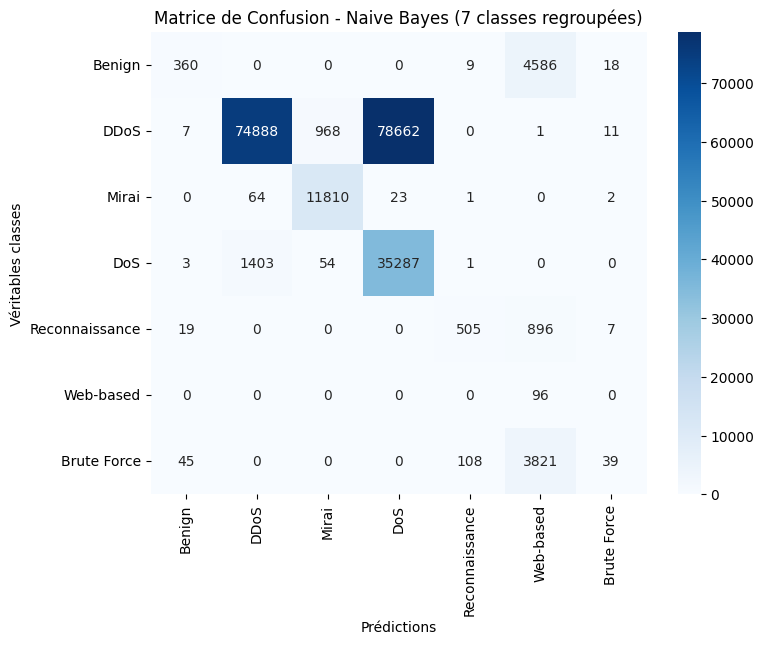

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_grouped, y_pred, labels=[
    'Benign', 'DDoS', 'Mirai', 'DoS', 'Reconnaissance', 'Web-based', 'Brute Force'
])

# Affichage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'DDoS', 'Mirai', 'DoS', 'Reconnaissance', 'Web-based', 'Brute Force'],
            yticklabels=['Benign', 'DDoS', 'Mirai', 'DoS', 'Reconnaissance', 'Web-based', 'Brute Force'])
plt.title("Matrice de Confusion - Naive Bayes (7 classes regroupées)")
plt.xlabel("Prédictions")
plt.ylabel("Véritables classes")
plt.show()


✅ Distribution des étiquettes après regroupement :
Label_Grouped
DDoS           515120
Dos            122495
Mirai           39664
Web_based       19011
Reconn           8489
Spoofing         7328
Brute Force       204
Name: count, dtype: int64 



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


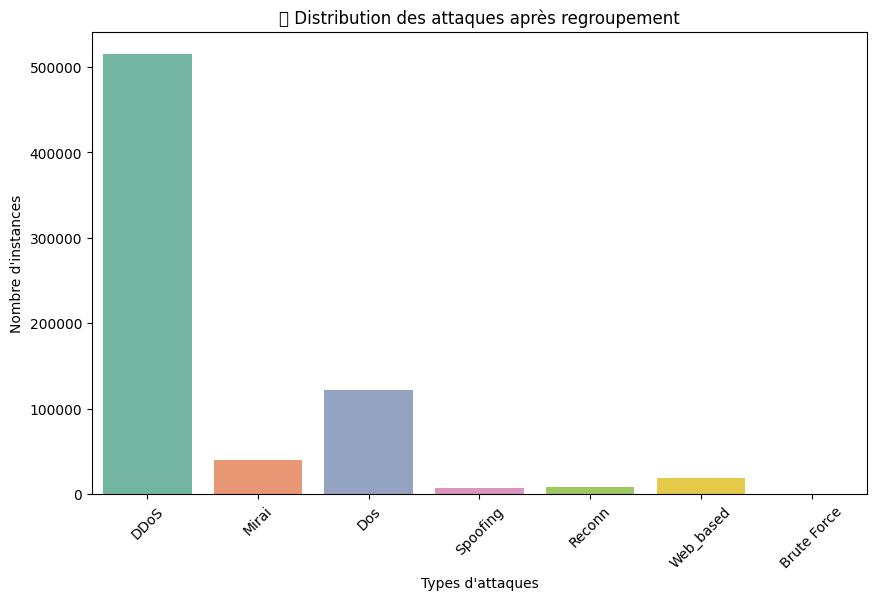

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Charger les données
df = pd.read_csv("/kaggle/input/iot-dataset/Merged01.csv")

# 2. Vérifier ou reconstruire la colonne 'Label'
if 'Label' not in df.columns:
    # Si la colonne 'Label' n'existe pas, reconstruire 'Label' à partir des colonnes existantes
    label_columns = [col for col in df.columns if col.startswith('Label_')]
    if label_columns:
        df['Label'] = df[label_columns].idxmax(axis=1).str.replace('Label_', '')
    else:
        print("❌ La colonne 'Label' n'existe pas.")
        exit()

# 3. Regrouper les attaques en 7 classes personnalisées
attack_groups = {
    'DDoS': ['DDoS', 'UDP-Flood', 'ICMP-Flood', 'TCP-SYN-Flood'],
    'Mirai': ['Mirai', 'Mirai-UDP', 'Mirai-HTTP', 'Mirai-Attack'],
    'Reconn': ['Scan', 'PortScan', 'Reconnaissance'],
    'Dos': ['Dos'],
    'Spoofing': ['Spoofing'],
    'Brute Force': ['BruteForce', 'SSH-Bruteforce', 'FTP-Bruteforce'],
    'Web_based': ['Web_based']
}

# Fonction pour regrouper les attaques
def group_attack(label):
    label = str(label).lower()
    for group, keywords in attack_groups.items():
        if any(keyword.lower() in label for keyword in keywords):
            return group
    return 'Web_based'

# Appliquer le regroupement des attaques
df['Label_Grouped'] = df['Label'].apply(group_attack)

# 4. Affichage de la distribution des étiquettes regroupées
print("✅ Distribution des étiquettes après regroupement :")
print(df['Label_Grouped'].value_counts(), "\n")

# 5. Visualisation de la distribution des classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Label_Grouped', data=df, palette='Set2')
plt.title("✅ Distribution des attaques après regroupement")
plt.xlabel('Types d\'attaques')
plt.ylabel('Nombre d\'instances')
plt.xticks(rotation=45)
plt.show()